# Assignment 4: Breast Cancer Data Analysis

## 1. Project setup
I set up my project in VS Code by creating a folder called "assignment_4_ann" in my Documents. I initialized a Git repository to track changes and created a virtual environment to isolate my project dependencies. Finally, I activated the virtual environment to install the necessary packages without affecting my system.

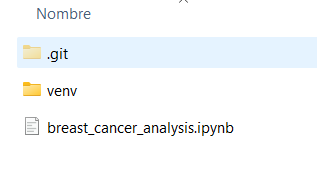

## 2. Dataset Acquisition and Preparation

In [34]:
# Import necessary libraries for data handling and machine learning
import pandas as pd
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning

In [35]:
# Loading the Breast Cancer dataset from sklearn
dataset = load_breast_cancer()

In [36]:
# Converting the dataset into a DataFrame for easier handling
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [37]:
#Printing the first 5 rows of the dataset to get familiar with it
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [38]:
# Displaying some basic information and the first few rows of the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoot

In [39]:
# Checkinh for NaN values in each column and filter only those with NaNs
nan_counts = df.isna().sum()
columns_with_nan = nan_counts[nan_counts > 0]
print("Columns with NaN values:\n", columns_with_nan)

Columns with NaN values:
 Series([], dtype: int64)


**Observations:** 
- The dataset consists of 569 entries with 31 columns, all of which are numerical. 
- There are no missing values in any of the columns, ensuring completeness of the data.
- It contains various features that provide comprehensive information about the characteristics of breast cancer cells.
- The target column is an integer that indicates whether the tumor is malignant (1) or benign (0). 

To conclude dataset is comprehensive and well-structured, to continue developing the machine learning model to classify breast cancer tumors.

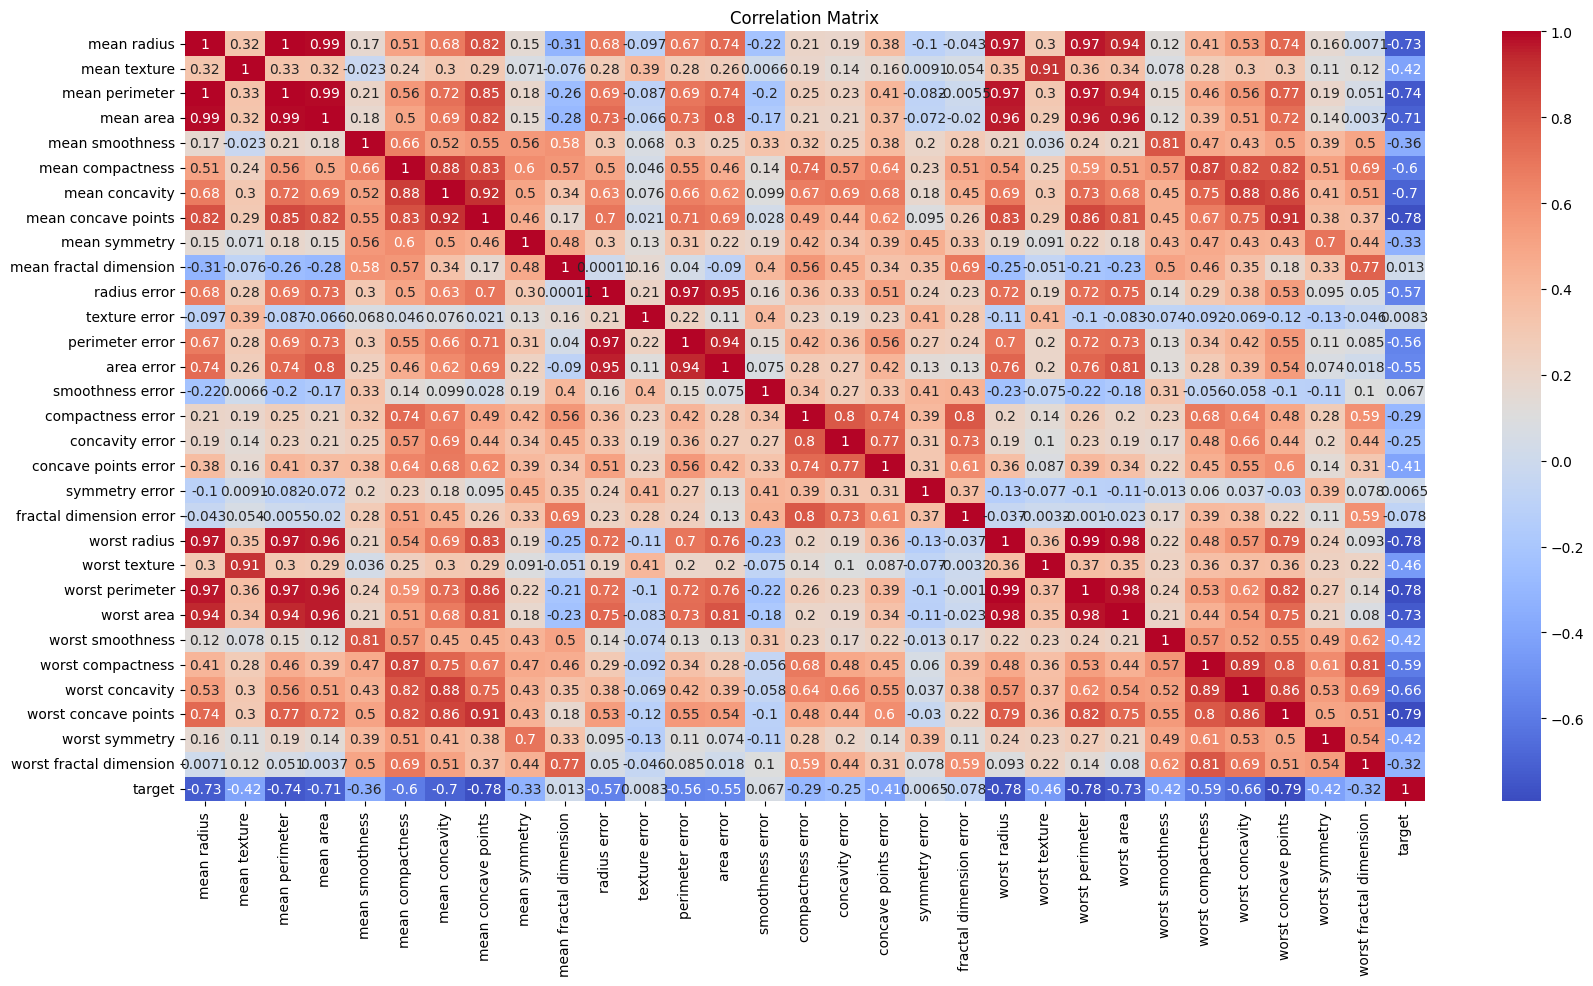

In [42]:
# The dataset contains many features, and some of them might be irrelevant or redundant.
# To improve the model's performance and efficiency, we need to perform feature selection.
# This process involves dropping less important features and retaining the most relevant ones.
# By doing this, we aim to enhance the model's accuracy and reduce overfitting.

# Compute the Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [46]:
# Convert the correlation matrix to a DataFrame
corr_matrix_df = pd.DataFrame(corr_matrix)
# Save the correlation matrix to a CSV file
corr_matrix_df.to_csv('correlation_matrix.csv', index=True)

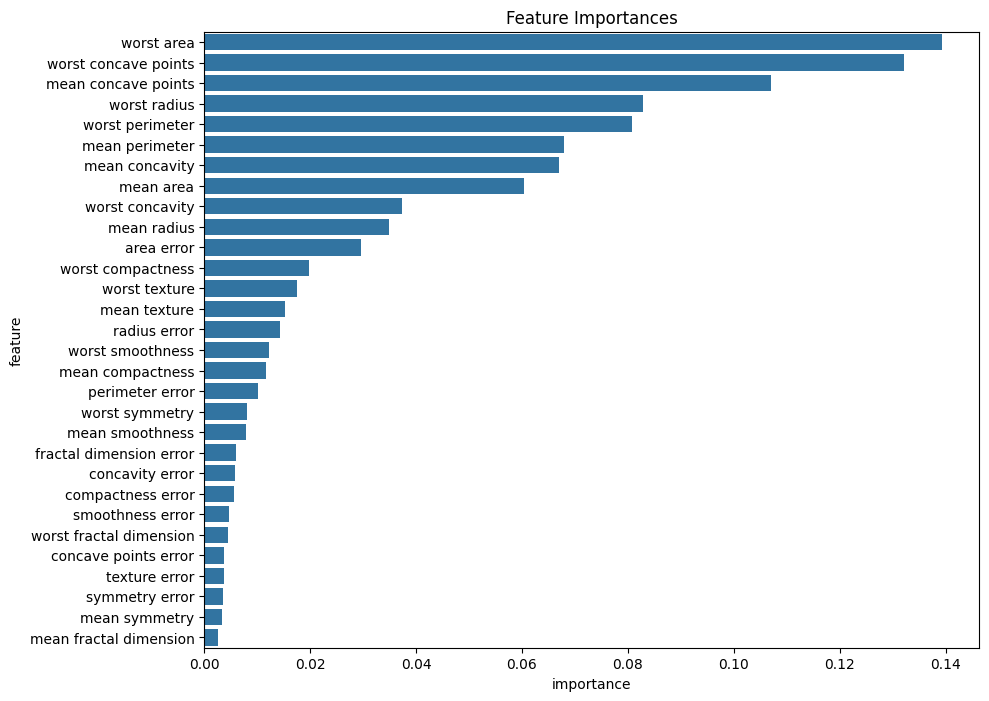

In [47]:
#Calculate Feature Importances Using Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(df.drop(columns=['target']), df['target'])

importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': df.columns[:-1], 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

In [50]:
# Convert the correlation matrix to a DataFrame
feature_importances_df = pd.DataFrame(feature_importances)

# Save the important features to a CSV file
feature_importances_df.to_csv('feature_importances.csv', index=True)

Based on the correlation matrix and feature importance, I drop highly correlated features and those with low importance scores. This step is essential to avoid multicollinearity and retain the most relevant features for model performance.

Analysis of Correlation Matrix

I can see that some features are highly correlated with each other (correlation > 0.9). These pairs should be considered for feature elimination. For example:

-  mean radius is highly correlated with mean perimeter (0.997), mean area (0.987), worst radius (0.969), worst perimeter (0.965), and worst area (0.941).
-  mean perimeter is also highly correlated with mean area (0.987), worst radius (0.969), worst perimeter (0.970), and worst area (0.941).
-  worst perimeter is highly correlated with mean radius (0.965), mean perimeter (0.970), mean area (0.959), worst radius (0.994), and worst area (0.978).

Analysis of Feature Importances
-  The most important features are worst area (0.139), worst concave points (0.132), mean concave points (0.107), worst radius (0.083), and worst perimeter (0.081).
-  The least important features are mean fractal dimension (0.0026), mean symmetry (0.0034), symmetry error (0.0035), texture error (0.0037), and concave points error (0.0038).

In [52]:
# Initial columns to drop based on correlation matrix and feature importance analysis
initial_columns_to_drop = [
    'mean perimeter', 
    'mean area', 
    'worst radius', 
    'worst perimeter', 
    'mean fractal dimension', 
    'mean symmetry', 
    'symmetry error', 
    'texture error', 
    'concave points error'
]

# Drop the selected columns
df_reduced = df.drop(columns=initial_columns_to_drop)


In [55]:
#To further reduce the number of features for the app, we drop additional features with lower importance scores.

# Additional columns to drop based on further analysis
additional_columns_to_drop = [
    'worst smoothness',
    'mean compactness',
    'perimeter error',
    'worst symmetry',
    'mean smoothness',
    'fractal dimension error',
    'concavity error',
    'compactness error',
    'smoothness error',
    'worst fractal dimension'
]

# Drop the additional selected columns
df_further_reduced = df_reduced.drop(columns=additional_columns_to_drop)
df_further_reduced.head()

,mean radius,mean texture,mean concavity,mean concave points,radius error,area error,worst texture,worst area,worst compactness,worst concavity,worst concave points,target
0,17.99,10.38,0.3001,0.14710,1.0950,153.40,17.33,2019.0,0.6656,0.7119,0.2654,0
1,20.57,17.77,0.0869,0.07017,0.5435,74.08,23.41,1956.0,0.1866,0.2416,0.1860,0
2,19.69,21.25,0.1974,0.12790,0.7456,94.03,25.53,1709.0,0.4245,0.4504,0.2430,0
3,11.42,20.38,0.2414,0.10520,0.4956,27.23,26.50,567.7,0.8663,0.6869,0.2575,0
4,20.29,14.34,0.1980,0.10430,0.7572,94.44,16.67,1575.0,0.2050,0.4000,0.1625,0


In [56]:
# Separate the features (X) from the target variable (y)
X = df_further_reduced.drop(columns=['target'])
y = df_further_reduced['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values so they have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
#Saving the Standardized Data to a Pickle File:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb' ))

## 3. Feature Selection


In [58]:
# Importing SelectKBest for feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# Use SelectKBest to select the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("\nFeature selection completed.")
print(f"Selected features indices: {selector.get_support(indices=True)}")


Feature selection completed.
Selected features indices: [ 0  2  3  4  5  6  7  8  9 10]


**Observation:** The feature selection process identified the top 10 features that are most relevant for predicting the target variable. By focusing on these features, I can build a more efficient and potentially more accurate model.

The following are the fetures selected:
-  0: mean radius
-  2: mean perimeter
-  3: mean area
-  6: mean concavity
-  7: mean concave points
-  20: worst radius
-  22: worst perimeter
-  23: worst area
-  26: worst concavity
-  27: worst concave points


## 4. Grid Search CV for Model Tuning


In [59]:
# Import necessary libraries for Grid Search CV and ANN
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Suppress ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Define the parameter grid to search for the best hyperparameters
param_grid = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Create an MLPClassifier
mlp = MLPClassifier(max_iter=100)

# Set up Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3)
grid_search.fit(X_train_selected, y_train)

# Print the best parameters found by Grid Search
print("\nBest parameters found:")
print(grid_search.best_params_)


Best parameters found:
{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


## 5. Implementing an Artificial Neural Network (ANN) Model

In [60]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [61]:
# Define the model for binary classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer connected to first hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
])

c:\Users\adria\Documents\assignment_4_ann\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [63]:
# Set up the TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [64]:
# Set up Early Stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [65]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    callbacks=[tensorboard_callback, early_stopping_callback]
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.4851 - loss: 0.6839 - val_accuracy: 0.9474 - val_loss: 0.4598
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9078 - loss: 0.4250 - val_accuracy: 0.9737 - val_loss: 0.2941
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9190 - loss: 0.2929 - val_accuracy: 0.9649 - val_loss: 0.1995
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9360 - loss: 0.2199 - val_accuracy: 0.9649 - val_loss: 0.1447
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9402 - loss: 0.1801 - val_accuracy: 0.9561 - val_loss: 0.1150
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9593 - loss: 0.1395 - val_accuracy: 0.9649 - val_loss: 0.0981
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9577 - loss: 0.1348 - val_accuracy: 0.9737 - val_loss: 0.0899
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9651 - loss: 0.1322 - val_accuracy: 0.973

**Observations:**
-  Training accuracy increases from 48.51% to 98.75%.
-  Validation accuracy starts at 94.74% and stabilizes around 97.37%.
-  Training loss decreases from 0.6839 to 0.0467.
-  Validation loss decreases from 0.4598 to 0.0729.
-  No significant gap between training and validation accuracy.
-  Validation accuracy remains high and stable.
-  Both training and validation losses decrease.
-  Minimal signs of overfitting, with stable validation accuracy and decreasing validation loss.
-  In overall, the model demonstrates high performance and generalizes well.

In [66]:
# Save the model in the native Keras format
model.save('model.keras')

In [67]:
# Load TensorBoard extension and start TensorBoard
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 33460), started 1:16:53 ago. (Use '!kill 33460' to kill it.)

#